In [1]:
from faces import FaceShard
from emotions import EmotionShard
from behavior import WindowShard, ScreenShard

from mirror import Mirror

from config import EMOTIONLOG, WINDOWLOG, SCREENSHOT_DIR, MIRRORLOG, FACE_DIR


shards = [FaceShard(FACE_DIR), EmotionShard(logfile=EMOTIONLOG)]
shards.append(WindowShard(logfile=WINDOWLOG))
shards.append(ScreenShard(logdir=SCREENSHOT_DIR))
mirror = Mirror(shards=shards, lens=None, logfile=MIRRORLOG)

In [ ]:
states = mirror.remember()

In [5]:
# Let's consider the more interesting ones by filtering

emotions = set([state['emotions'][0]['emotion'] for state in states if len(state['emotions'])>0])

# Filter by detected emotion
ids_by_emotion = {}
for emotion in emotions:
    ids_by_emotion[emotion] = [state['ID'] for state in states
                               if len(state['emotions'])>0 and state['emotions'][0]['emotion']==emotion]
    
ids_by_emotion.keys()

dict_keys(['neutral', 'surprise', 'happiness'])

In [9]:
emotion = 'surprise'

ids = sorted(ids_by_emotion[emotion])
print("%d relevant logs" % len(ids))

state_by_id = {state['ID']: state for state in states}

# Find for which IDs we have a capture available
ids = [i for i in ids if 'faces' in state_by_id[i] and state_by_id[i]['faces'] is not None]
print("%d relevant logs with captures" % len(ids))

# Find for which IDs we also have a screenshot
ids = [i for i in ids if 'screenshot' in state_by_id[i] and state_by_id[i]['screenshot'] is not None]
print("%d relevant logs with screenshots" % len(ids))

7 relevant logs
1 relevant logs with screenshots


In [13]:
import random

id_ = random.choice(ids)
print(id_)

state = state_by_id[id_]
print("Detected emotion:", state['emotions'][0]['emotion'])
print("Behavior at the time:", state['active_window'])

#state['screenshot']

228
Detected emotion: surprise
Behavior at the time: {'title': 'mirror : python', 'class': 'konsole, konsole'}


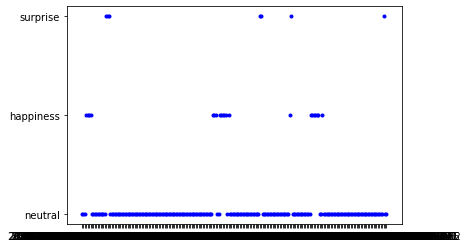

In [18]:
# Now show emotions over time
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []

for state in states:
    #x.append(id_)
    if len(state['emotions'])>0:
        x.append(state['timestamp'])
        y.append(state['emotions'][0]['emotion'])
    
plt.plot(x, y, 'b.')